<Axes: xlabel='k', ylabel='discrepancy'>

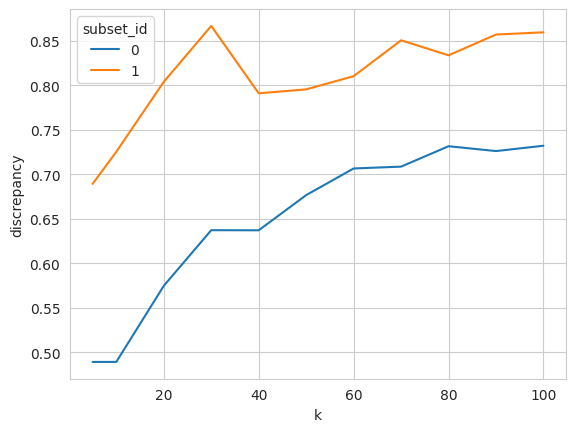

In [ ]:
from __future__ import annotations

from pathlib import Path

import pandas as pd
import seaborn as sns


def read_info(info_fn: str | Path) -> pd.DataFrame:
    info = pd.read_csv(info_fn)
    info["info_fn"] = info_fn
    if "subset_id" not in info.columns:
        info["subset_id"] = info["subset_fn"].apply(lambda x: Path(x).stem.split("_")[-1])
    return info

resultpath = "results/BBv2"

info_fn_template = "subselect_results_{k}.csv"

info_fns = list(Path(resultpath).glob("**/subselect_results_*.csv"))
infos = pd.concat([read_info(fn) for fn in info_fns])

sns.set_style("whitegrid")
sns.lineplot(data=infos, x="k", y="discrepancy", hue="subset_id", marker="o")